In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score,classification_report,f1_score
from sklearn.model_selection import train_test_split, GridSearchCV
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer 
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 

import math
import torch
from torch import nn
from torch import optim
from torchvision.datasets import MNIST
from torch.utils.data import TensorDataset, DataLoader

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torch.autograd import Variable
from torchvision import datasets, transforms
import torch.utils.data as utils
from torch.optim import Adam 

In [3]:
trainloader = torch.utils.data.DataLoader(
        datasets.MNIST('MNIST_data/', train=True, download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor(),
                           transforms.Normalize((0.1307,), (0.3081,))
                       ])),
        batch_size=16, shuffle=True)
test_loader = torch.utils.data.DataLoader(
        datasets.MNIST('MNIST_data/', train=False, transform=transforms.Compose([
                           transforms.ToTensor(),
                           transforms.Normalize((0.1307,), (0.3081,))
                       ])),
        batch_size=16, shuffle=True)

In [4]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)
device = torch.device('cpu')

cuda


In [5]:
def call_pr_loss(a , variance):
    k = len(a[0])
    l = torch.sum(a**2)/ variance**2 /2/k
    return k/2*math.log(2*math.pi) + 0.5*math.log(variance**k) + l

In [6]:
m_200 = 1
m_784 = 1

In [9]:
def eva(test_loader , model):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            data = data.view(data.size(0), -1)
            output = model(data)
            test_loss += criterion(output, target).item()  # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))
    return (test_loss ,correct / len(test_loader.dataset) )

In [23]:
model = nn.Sequential()
model.add_module('l1', nn.Linear(784, 200))
model.add_module('r1', nn.ReLU())
model.add_module('l2', nn.Linear(200, 200))
model.add_module('r2', nn.ReLU())
model.add_module('l3', nn.Linear(200, 200))
model.add_module('r3', nn.ReLU())
model.add_module('l4', nn.Linear(200, 200))
model.add_module('r4', nn.ReLU())
model.add_module('l5', nn.Linear(200, 200))
model.add_module('r5', nn.ReLU())
model.add_module('l6', nn.Linear(200, 200))
model.add_module('r6', nn.ReLU())
model.add_module('l7', nn.Linear(200, 200))
model.add_module('r7', nn.ReLU())
model.add_module('l8', nn.Linear(200, 200))
model.add_module('r8', nn.ReLU())
model.add_module('lf', nn.Linear(200, 10))

model.to(device)

Sequential(
  (l1): Linear(in_features=784, out_features=200, bias=True)
  (r1): ReLU()
  (l2): Linear(in_features=200, out_features=200, bias=True)
  (r2): ReLU()
  (l3): Linear(in_features=200, out_features=200, bias=True)
  (r3): ReLU()
  (l4): Linear(in_features=200, out_features=200, bias=True)
  (r4): ReLU()
  (l5): Linear(in_features=200, out_features=200, bias=True)
  (r5): ReLU()
  (l6): Linear(in_features=200, out_features=200, bias=True)
  (r6): ReLU()
  (l7): Linear(in_features=200, out_features=200, bias=True)
  (r7): ReLU()
  (l8): Linear(in_features=200, out_features=200, bias=True)
  (r8): ReLU()
  (lf): Linear(in_features=200, out_features=10, bias=True)
)

In [19]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=1, gamma=0.1)

model.train()
step = 0 
loss_history = []
for epoch in range(1, 3):
    for batch_idx, (data, target) in enumerate(trainloader):
        
        data, target = data.to(device), target.to(device)
        data = data.view(data.size(0), -1)
        optimizer.zero_grad()
        output = model(data)
        loss_0 = criterion(output, target)
        
        loss_1 = call_pr_loss(model.l1.weight , m_784)
        
        loss_2 = call_pr_loss(model.l2.weight , m_200)
        loss_3 = call_pr_loss(model.l3.weight , m_200)
        loss_4 = call_pr_loss(model.l4.weight , m_200)
        loss_5 = call_pr_loss(model.l5.weight , m_200)
        loss_6 = call_pr_loss(model.l6.weight , m_200)
        loss_7 = call_pr_loss(model.l7.weight , m_200)
        loss_8 = call_pr_loss(model.l8.weight , m_200)
        
        loss_f = call_pr_loss(model.lf.weight , m_200)
        
        
        loss = loss_0   + loss_1+ loss_2+ loss_3 + loss_4  + loss_5 + loss_6 + loss_7 + loss_8 +loss_f
        loss.backward()
        optimizer.step()
        step += 1
        loss_history.append(loss.item())
        if step % 1000  == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f} '.format(
                epoch, batch_idx * len(data), len(trainloader.dataset),
                100. * batch_idx / len(trainloader), loss.item()))
    scheduler.step()
    eva( test_loader, model )

Train Epoch: 1 [15984/60000 (27%)]	Loss: 2193.050293 
Train Epoch: 1 [31984/60000 (53%)]	Loss: 2193.048340 
Train Epoch: 1 [47984/60000 (80%)]	Loss: 2193.039062 

Test set: Average loss: 0.1438, Accuracy: 1135/10000 (11%)

Train Epoch: 2 [3984/60000 (7%)]	Loss: 2193.051514 
Train Epoch: 2 [19984/60000 (33%)]	Loss: 2193.061279 
Train Epoch: 2 [35984/60000 (60%)]	Loss: 2193.034668 
Train Epoch: 2 [51984/60000 (87%)]	Loss: 2193.046631 

Test set: Average loss: 0.1438, Accuracy: 1135/10000 (11%)



In [ ]:
 c, d = eva(test_loader , model)

In [11]:
b = np.linspace(-100,100,100)

In [12]:
loss_from_t = []
acc = []
s = 0
for i in b:
    model.l1.weight[10][10] = i
    test_loss, accur = eva(test_loader , model)
    loss_from_t.append(test_loss)
    acc.append(accur)
    print(s)
    s += 1
    


Test set: Average loss: 0.3702, Accuracy: 2759/10000 (28%)

0

Test set: Average loss: 0.3526, Accuracy: 2894/10000 (29%)

1

Test set: Average loss: 0.3353, Accuracy: 3020/10000 (30%)

2

Test set: Average loss: 0.3182, Accuracy: 3160/10000 (32%)

3

Test set: Average loss: 0.3014, Accuracy: 3321/10000 (33%)

4

Test set: Average loss: 0.2851, Accuracy: 3466/10000 (35%)

5

Test set: Average loss: 0.2693, Accuracy: 3631/10000 (36%)

6

Test set: Average loss: 0.2540, Accuracy: 3790/10000 (38%)

7

Test set: Average loss: 0.2390, Accuracy: 3974/10000 (40%)

8

Test set: Average loss: 0.2242, Accuracy: 4166/10000 (42%)

9

Test set: Average loss: 0.2096, Accuracy: 4365/10000 (44%)

10

Test set: Average loss: 0.1952, Accuracy: 4586/10000 (46%)

11

Test set: Average loss: 0.1811, Accuracy: 4825/10000 (48%)

12

Test set: Average loss: 0.1676, Accuracy: 5078/10000 (51%)

13

Test set: Average loss: 0.1546, Accuracy: 5342/10000 (53%)

14

Test set: Average loss: 0.1419, Accuracy: 5599/10

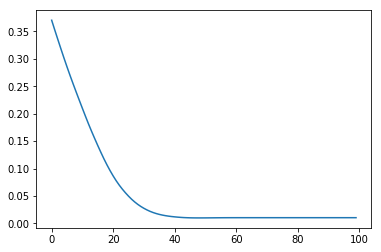

In [13]:
plt.plot(loss_from_t)

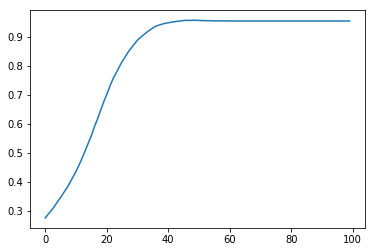

In [14]:
plt.plot(acc)

In [20]:
loss_from_t = []
acc = []
s = 0
for i in b:
    model.l2.weight[10][10] = i
    test_loss, accur = eva(test_loader , model)
    loss_from_t.append(test_loss)
    acc.append(accur)
    print(s)
    s += 1


Test set: Average loss: 0.1438, Accuracy: 1135/10000 (11%)

0

Test set: Average loss: 0.1438, Accuracy: 1135/10000 (11%)

1

Test set: Average loss: 0.1438, Accuracy: 1135/10000 (11%)

2

Test set: Average loss: 0.1438, Accuracy: 1135/10000 (11%)

3

Test set: Average loss: 0.1438, Accuracy: 1135/10000 (11%)

4

Test set: Average loss: 0.1438, Accuracy: 1135/10000 (11%)

5

Test set: Average loss: 0.1438, Accuracy: 1135/10000 (11%)

6

Test set: Average loss: 0.1438, Accuracy: 1135/10000 (11%)

7

Test set: Average loss: 0.1438, Accuracy: 1135/10000 (11%)

8

Test set: Average loss: 0.1438, Accuracy: 1135/10000 (11%)

9

Test set: Average loss: 0.1438, Accuracy: 1135/10000 (11%)

10

Test set: Average loss: 0.1438, Accuracy: 1135/10000 (11%)

11


KeyboardInterrupt: 

In [ ]:
plt.plot(loss_from_t)

In [ ]:
plt.plot(acc)

In [21]:
b = np.linspace(0.9 ,20 , 100)

In [24]:
test_loss_from_var = []
accur_from_var = []
train_loss_history = []
s = 0
for i in b:
    m_200 = i
    m_784 = i
    model = nn.Sequential()
    model.add_module('l1', nn.Linear(784, 200))
    model.add_module('r1', nn.ReLU())
    model.add_module('l2', nn.Linear(200, 200))
    model.add_module('r2', nn.ReLU())
    model.add_module('l3', nn.Linear(200, 200))
    model.add_module('r3', nn.ReLU())
    model.add_module('l4', nn.Linear(200, 200))
    model.add_module('r4', nn.ReLU())
    model.add_module('l5', nn.Linear(200, 200))
    model.add_module('r5', nn.ReLU())
    model.add_module('l6', nn.Linear(200, 200))
    model.add_module('r6', nn.ReLU())
    model.add_module('l7', nn.Linear(200, 200))
    model.add_module('r7', nn.ReLU())
    model.add_module('l8', nn.Linear(200, 200))
    model.add_module('r8', nn.ReLU())
    model.add_module('lf', nn.Linear(200, 10))

    model.to(device)

    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    #scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=1, gamma=0.1)

    model.train()
    step = 0 
    loss_history = []
    for epoch in range(1, 3):
        for batch_idx, (data, target) in enumerate(trainloader):

            data, target = data.to(device), target.to(device)
            data = data.view(data.size(0), -1)
            optimizer.zero_grad()
            output = model(data)
            loss_0 = criterion(output, target)
        
            loss_1 = call_pr_loss(model.l1.weight , m_784)

            loss_2 = call_pr_loss(model.l2.weight , m_200)
            loss_3 = call_pr_loss(model.l3.weight , m_200)
            loss_4 = call_pr_loss(model.l4.weight , m_200)
            loss_5 = call_pr_loss(model.l5.weight , m_200)
            loss_6 = call_pr_loss(model.l6.weight , m_200)
            loss_7 = call_pr_loss(model.l7.weight , m_200)
            loss_8 = call_pr_loss(model.l8.weight , m_200)

            loss_f = call_pr_loss(model.lf.weight , m_200)


            loss = loss_0   + loss_1+ loss_2+ loss_3 + loss_4  + loss_5 + loss_6 + loss_7 + loss_8 +loss_f
            loss.backward()
            optimizer.step()
            step += 1
            loss_history.append(loss.item())
            #if step % 1000  == 0:
        print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f} '.format(
            epoch, batch_idx * len(data), len(trainloader.dataset),
            100. * batch_idx / len(trainloader), loss.item()))
        #scheduler.step()  
        
        
    test_loss, accur = eva(test_loader , model)
    
    test_loss_from_var.append(test_loss)
    accur_from_var.append(accur)
    train_loss_history.append(loss_history)
    print(s)
    s += 1
    

Train Epoch: 1 [59984/60000 (100%)]	Loss: 2067.464355 
Train Epoch: 2 [59984/60000 (100%)]	Loss: 2067.456787 

Test set: Average loss: 0.1438, Accuracy: 1135/10000 (11%)

0
Train Epoch: 1 [59984/60000 (100%)]	Loss: 2298.965088 
Train Epoch: 2 [59984/60000 (100%)]	Loss: 2298.989258 

Test set: Average loss: 0.1438, Accuracy: 1135/10000 (11%)

1
Train Epoch: 1 [59984/60000 (100%)]	Loss: 2492.739502 
Train Epoch: 2 [59984/60000 (100%)]	Loss: 2492.734375 

Test set: Average loss: 0.1438, Accuracy: 1135/10000 (11%)

2
Train Epoch: 1 [59984/60000 (100%)]	Loss: 2657.564209 
Train Epoch: 2 [59984/60000 (100%)]	Loss: 2657.275635 

Test set: Average loss: 0.0137, Accuracy: 9416/10000 (94%)

3
Train Epoch: 1 [59984/60000 (100%)]	Loss: 2803.755371 
Train Epoch: 2 [59984/60000 (100%)]	Loss: 2803.707764 

Test set: Average loss: 0.0143, Accuracy: 9419/10000 (94%)

4
Train Epoch: 1 [59984/60000 (100%)]	Loss: 2934.079346 
Train Epoch: 2 [59984/60000 (100%)]	Loss: 2933.643066 

Test set: Average loss: 

C:\Apps\anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in double_scalars
  after removing the cwd from sys.path.


Train Epoch: 1 [59984/60000 (100%)]	Loss: inf 
Train Epoch: 2 [59984/60000 (100%)]	Loss: inf 

Test set: Average loss: 0.0152, Accuracy: 9431/10000 (94%)

9
Train Epoch: 1 [59984/60000 (100%)]	Loss: inf 
Train Epoch: 2 [59984/60000 (100%)]	Loss: inf 

Test set: Average loss: 0.0117, Accuracy: 9512/10000 (95%)

10
Train Epoch: 1 [59984/60000 (100%)]	Loss: inf 
Train Epoch: 2 [59984/60000 (100%)]	Loss: inf 

Test set: Average loss: 0.0111, Accuracy: 9556/10000 (96%)

11
Train Epoch: 1 [59984/60000 (100%)]	Loss: inf 
Train Epoch: 2 [59984/60000 (100%)]	Loss: inf 

Test set: Average loss: 0.0118, Accuracy: 9565/10000 (96%)

12
Train Epoch: 1 [59984/60000 (100%)]	Loss: inf 
Train Epoch: 2 [59984/60000 (100%)]	Loss: inf 

Test set: Average loss: 0.0109, Accuracy: 9553/10000 (96%)

13
Train Epoch: 1 [59984/60000 (100%)]	Loss: inf 
Train Epoch: 2 [59984/60000 (100%)]	Loss: inf 

Test set: Average loss: 0.0112, Accuracy: 9556/10000 (96%)

14
Train Epoch: 1 [59984/60000 (100%)]	Loss: inf 
Train 


60
Train Epoch: 1 [59984/60000 (100%)]	Loss: inf 
Train Epoch: 2 [59984/60000 (100%)]	Loss: inf 

Test set: Average loss: 0.0102, Accuracy: 9607/10000 (96%)

61
Train Epoch: 1 [59984/60000 (100%)]	Loss: inf 
Train Epoch: 2 [59984/60000 (100%)]	Loss: inf 

Test set: Average loss: 0.0111, Accuracy: 9574/10000 (96%)

62
Train Epoch: 1 [59984/60000 (100%)]	Loss: inf 
Train Epoch: 2 [59984/60000 (100%)]	Loss: inf 

Test set: Average loss: 0.0118, Accuracy: 9507/10000 (95%)

63
Train Epoch: 1 [59984/60000 (100%)]	Loss: inf 
Train Epoch: 2 [59984/60000 (100%)]	Loss: inf 

Test set: Average loss: 0.0117, Accuracy: 9544/10000 (95%)

64
Train Epoch: 1 [59984/60000 (100%)]	Loss: inf 
Train Epoch: 2 [59984/60000 (100%)]	Loss: inf 

Test set: Average loss: 0.0106, Accuracy: 9609/10000 (96%)

65
Train Epoch: 1 [59984/60000 (100%)]	Loss: inf 
Train Epoch: 2 [59984/60000 (100%)]	Loss: inf 

Test set: Average loss: 0.0094, Accuracy: 9622/10000 (96%)

66
Train Epoch: 1 [59984/60000 (100%)]	Loss: inf 
T

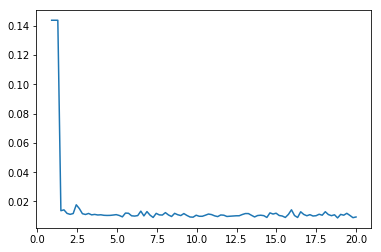

In [25]:
plt.plot(b , test_loss_from_var )

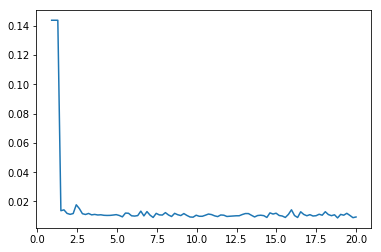

In [26]:
plt.plot( b , test_loss_from_var)

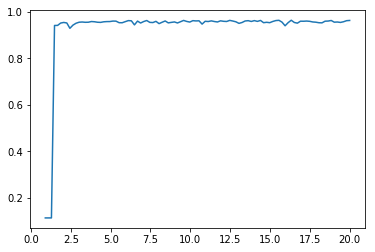

In [27]:
plt.plot( b , accur_from_var)